In [1]:
from drn_interactions.interactions.loaders import SpontaneousActivityLoader, StateInteractionsLoader
from drn_interactions.interactions.preprocessors import InteractionsPreprocessor
from drn_interactions.interactions.pairwise import PairwiseCorr
from drn_interactions.interactions.graph_clustering import df_to_graph
from drn_interactions.config import Config, ExperimentInfo
import numpy as np
from drn_interactions.interactions.graph import GraphAttributes, NodeAttributes
import pandas as pd
import seaborn as sns
from drn_interactions.io import load_derived_generic, load_distances
from drn_interactions.transforms.graph import GraphTransformer
import networkx as nx

%load_ext autoreload
%autoreload 2

In [15]:
neuron_types = load_derived_generic("neuron_types.csv")
df_distance = load_distances()
spont_ensembles = load_derived_generic("ensembles/spont - ensembles.csv")


graph_attrs = GraphAttributes(inverse_distance=True)
node_attrs = NodeAttributes()
sessions = ExperimentInfo.eeg_sessions

loader = SpontaneousActivityLoader(sessions[6])
preprocessor = InteractionsPreprocessor()
pairwise = PairwiseCorr(rectify=True)
transformer = GraphTransformer(
    relabel_nodes=True, 
    weight_attr="weight", 
    neuron_types=neuron_types, 
    df_distance=df_distance,
    df_ensemble=spont_ensembles,
    )

spikes = preprocessor(loader())
df_affinity = (
    pairwise
    .fit(spikes)
    .get_adjacency_df()
    .dropna(axis=1, thresh=5)
    .dropna(axis=0, thresh=5)
)
G = transformer.df_affinity_to_graph(df_affinity)

In [16]:
spont_ensembles.loc[lambda x: x.ensemble != -1]

,neuron_id,ensemble,sig,session_name
5,9,1,True,ESHOCK_04_LOC1
6,43,1,True,ESHOCK_04_LOC1
7,17,1,True,ESHOCK_04_LOC1
8,18,1,True,ESHOCK_04_LOC1
9,40,1,True,ESHOCK_04_LOC1
...,...,...,...,...
557,2613,2674115,True,acute_11
558,2630,2674115,True,acute_11
559,2611,2674115,True,acute_11
560,2621,2674115,True,acute_11


In [21]:
df_edge = transformer.graph_to_edge_df(G)

<AxesSubplot:xlabel='distance', ylabel='weight'>

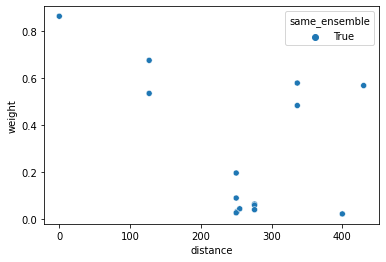

In [23]:
sns.scatterplot(x="distance", y="weight", data=df_edge, hue="same_ensemble")